## change label, source directory and destination directory

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.utils import resample
import datetime as dt
#%matplotlib notebook

'''
Defining manual label
0 - no obstacle
1 - rigid obstacle
2 - movable obstacle
3 - right wheel struck
4 - left wheel struck
5 - slip
6 - scratch
7 - wedge
8 - pithole
'''

Label = 2
file = '/home/roscon/Desktop/Data_latest/Class2-MovableObstacle/Trail1/Trail1.xls'
writer ='/home/roscon/Desktop/Data_latest/report_model/Trail1/2.xlsx'

## Defining a funtion to resample the data

In [2]:
def resample(dataframe):
    dataframe["Time Nsec"] = dataframe["Time Nsec"]/1000000000
    dataframe["Time sec"] = dataframe["Time sec"] + dataframe["Time Nsec"]
    dataframe["date"]= pd.to_datetime(dataframe["Time sec"],unit='s')
    dataframe.set_index("date",inplace=True)
    dataframe = dataframe[~dataframe.index.duplicated()]
    new_df = dataframe
    return new_df

### Getting the raw data from Bag file

In [3]:
# If data needs pre processing

#cmd_vel=pd.read_excel('/home/roscon/Desktop/Data/Class1-NoObstacle/Trail5/output_vel.xls',error_bad_lines=False) #command velocity load
#actual_vel=pd.read_excel('/home/roscon/Desktop/Data/Class1-NoObstacle/Trail5/output_Avel.xls') #actual velocity load
#current=pd.read_excel('/home/roscon/Desktop/Data/Class1-NoObstacle/Trail5/output_current.xls') #current load
#IMU=pd.read_excel('/home/roscon/Desktop/Data/Class1-NoObstacle/Trail5/output_IMU.xls') #IMU

#with pd.ExcelWriter('/home/roscon/Desktop/Data/Class1-NoObstacle/Trail5/Trail4.xlsx') as writer:  
 #   cmd_vel.to_excel(writer, sheet_name='cmd_vel')
  #  actual_vel.to_excel(writer, sheet_name='actual_vel')
   # current.to_excel(writer, sheet_name='current')
    #IMU.to_excel(writer, sheet_name='IMU')

In [4]:

data= pd.ExcelFile(file)

cmd_vel=pd.read_excel(file,sheet_name=0) #command velocity load
actual_vel=pd.read_excel(file,sheet_name=1) #actual velocity load
current=pd.read_excel(file,sheet_name=2) #current load
IMU=pd.read_excel(file,sheet_name=3) #IMU

In [5]:
# Storing starting time value

Starting_Time = cmd_vel.loc[0,'Time sec']

In [6]:
# Converting time as a series that starts with 0.

cmd_vel["Time update"] = cmd_vel["Time sec"]-Starting_Time
actual_vel["Time update"] = actual_vel["Time sec"]-Starting_Time
current["Time update"] = current["Time sec"]-Starting_Time
IMU["Time update"] = IMU["Time sec"]-Starting_Time



### Resampling 

In [7]:
# Resampling all the data and renaming column name

resampled_cmd = pd.DataFrame(resample(cmd_vel))
resampled_act = pd.DataFrame(resample(actual_vel))
resampled_current = pd.DataFrame(resample(current))
resampled_IMU = pd.DataFrame(resample(IMU))


In [8]:
resampled_cmd=resampled_cmd.rename(columns={'linear x':'command_vel'})
resampled_act=resampled_act.rename(columns={'linear x':'actual_vel'})
resampled_act=resampled_act.rename(columns={'angular z':'angular_vel'})



### Concatinating the data as per the requirement

In [9]:
# Creating new dataframe for concatination

new = pd.DataFrame()
new = pd.concat([resampled_cmd['command_vel'], resampled_act[['actual_vel','angular_vel']], resampled_current[['Right current', 'Left current','Bumper','Wheeldrop']]],axis=1)

# Manual labeling
new['Label'] = Label

#Dropping null/not assigned values
new=new.dropna()


In [10]:
#samples=min(resampled_IMU.index.shape,resampled_cmd.index.shape,resampled_act.index.shape,resampled_current.index.shape)[0]
#samples
new

,command_vel,actual_vel,angular_vel,Right current,Left current,Bumper,Wheeldrop,Label
date,,,,,,,,
2020-02-21 13:29:31.368589401,0.15,0.000000,0.000000,0.0,0.0,0.0,0.0,2
2020-02-21 13:29:31.418601274,0.15,0.000000,0.000000,0.0,0.0,0.0,0.0,2
2020-02-21 13:29:31.468591928,0.15,0.000000,0.000000,0.0,0.0,0.0,0.0,2
2020-02-21 13:29:31.518634080,0.15,0.014926,-0.009271,2.0,1.0,0.0,0.0,2
2020-02-21 13:29:31.568592072,0.15,0.060415,-0.018542,1.0,2.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...
2020-02-21 13:29:40.768592119,0.15,0.146418,0.000000,1.0,1.0,0.0,0.0,2
2020-02-21 13:29:40.818622828,0.15,0.145707,0.006181,1.0,1.0,0.0,0.0,2
2020-02-21 13:29:40.868592262,0.15,0.146418,0.000000,1.0,1.0,0.0,0.0,2


### Saving to excel

In [11]:
writer = pd.ExcelWriter(writer, engine= 'xlsxwriter')

In [12]:
new.to_excel(writer)


writer.save()

# Plotting

In [13]:
time = new.index


#command velocity
x_cmd = new["command_vel"]

#actual velocity
x_actual = new["actual_vel"]
z_actual = new["angular_vel"]


#current
right_current = new["Right current"]
left_current = new["Left current"]
bumper = new["Bumper"]
Wheeldrop = new["Wheeldrop"]


/home/roscon/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


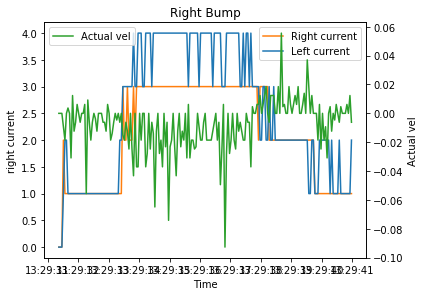

In [14]:
fig, ax1 = plt.subplots()

color = 'tab:red'

ax1.set_xlabel('Time')
ax1.set_ylabel('right current')
ax1.plot(time, right_current, 'C1', label= 'C1')
ax1.plot(time, left_current)
plt.legend(["Right current","Left current"])

color= 'tab:violet'
ax2 = ax1.twinx()
ax2.set_ylabel('Actual vel')
ax2.plot(time, z_actual,  'C2', label= 'C2')

plt.legend(["Actual vel"])


fig.tight_layout()
plt.title("Right Bump")

plt.show()





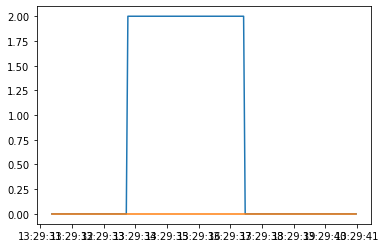

In [15]:
plt.plot(time,bumper)
plt.plot(time,Wheeldrop)